In [226]:
import numpy as np
import random
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

In [227]:
def schaffer_function(mat_x_y):
    x = mat_x_y[:, 0]
    y = mat_x_y[:, 1]
    g = 0.5 + (np.power((np.sin( np.sqrt( np.power(x, 2) + np.power(y, 2)))), 2) - 0.5)/ \
        (1 + 0.001 * (np.power(x, 2) + np.power(y, 2)))
    return g

In [228]:
type(schaffer_function)

function

In [229]:
np.array([(-10,10), (-10,10)])

array([[-10,  10],
       [-10,  10]])

In [230]:
class DifferentialEvolutionAlgorithm():
    def __init__(self,
                 num_epochs:int,
                 pop_size:int,
                 chrom_length:int,
                 value_ranges:list,
                 mutation_rate:float,
                 fitness_func, # Function Type,
                 crossover_rate = 0.8,
                 seed=42
                ):
        
        self.num_epochs = num_epochs
        self.pop_size = pop_size
        self.chrom_length = chrom_length
        self.value_ranges = np.array(value_ranges)
        self.mutation_rate = mutation_rate
        self.fitness_func = fitness_func
        self.seed = seed    
        self.crossover_rate = crossover_rate

        np.random.seed(seed=seed)

    def init_pop(self):
        """
        Initializes a matrix with random values from an uniform distribution
        """
        self.x_g = np.random.rand(self.pop_size, self.chrom_length)
        # Denormalization process
        min_mat = self.value_ranges.T[0, :]
        max_mat = self.value_ranges.T[1,:]
        self.x_g = self.x_g * (max_mat - min_mat) + min_mat
        return

    def mutation(self):
        mutation_ind_indices_1 = np.random.randint(low=0, high=self.pop_size, size=self.pop_size)
        mutation_ind_indices_2 = np.random.randint(low=0, high=self.pop_size, size=self.pop_size)
        self.v_g = self.x_g + self.mutation_rate * \
              (self.x_g[mutation_ind_indices_1] - self.x_g[mutation_ind_indices_2])
        return
                
    def crossover(self):
        crossover_prob = np.random.rand(self.pop_size, self.chrom_length)
        aleat_index = np.random.randint(low=0, high=self.chrom_length, size=self.pop_size)
        #aleat_index_ohe = np.zeros((aleat_index.size, aleat_index.max() + 1))
        aleat_index_ohe = np.full((aleat_index.size, aleat_index.max() + 1), fill_value=False, dtype=bool)
        aleat_index_ohe[np.arange(aleat_index.size, dtype=int), aleat_index] = True
        self.u_g = self.x_g.copy()
        self.u_g[crossover_prob >= self.crossover_rate] = self.v_g[crossover_prob >= self.crossover_rate]
        self.u_g[aleat_index_ohe] = self.v_g[aleat_index_ohe]
        return

    def selection(self):
        self.fitness_x_g = self.fitness_func(self.x_g)
        self.fitness_u_g = self.fitness_func(self.u_g)
        replacement_indices = self.fitness_u_g > self.fitness_x_g
        self.x_g[replacement_indices] = self.u_g[replacement_indices]
        return
    
    def fit(self):
        self.init_pop()
        for epoch in range(self.num_epochs):
            self.mutation()
            self.crossover()
            self.selection()
        return self.x_g



de_alg = DifferentialEvolutionAlgorithm(
                                        num_epochs=100,
                                        pop_size=50,
                                        chrom_length=2,
                                        value_ranges=[(-10,10), (-10,10)],
                                        mutation_rate=0.8,
                                        fitness_func=schaffer_function
                                        )
best_solutions = de_alg.fit()

In [231]:
best_solutions

array([[-1.51680626,  0.53610954],
       [ 4.63987884,  0.95479765],
       [-3.45056651, -3.24541387],
       [-2.6714486 ,  3.88674007],
       [-2.04826986, -4.23127187],
       [-5.49837016,  5.59088515],
       [-1.57693679, -0.22480801],
       [-2.93656125,  3.53532988],
       [-4.41685185,  1.72611401],
       [-1.36109963,  0.82445544],
       [ 1.22265746, -0.96786979],
       [-4.15710703,  2.12571765],
       [ 1.04723123, -1.13515764],
       [ 0.98769686, -7.74479138],
       [ 1.47613446,  0.36717912],
       [ 3.67770946,  2.95465391],
       [-3.65702781, -3.06525085],
       [ 5.05193567,  5.96708564],
       [ 3.5827319 , -3.04005546],
       [ 0.2659788 , -4.79882668],
       [-7.5592353 ,  2.29664883],
       [-2.64384607,  7.48621207],
       [-4.19339526, -2.1145088 ],
       [-1.57200658,  7.60486304],
       [-1.08673251, -1.13145888],
       [ 8.90871522,  6.42016964],
       [-0.58946739,  4.66505634],
       [11.21884738,  8.49403539],
       [ 3.22982967,

In [232]:
def schaffer_function_plot(x,y):
    g = 0.5 + (np.power((np.sin( np.sqrt( np.power(x, 2) + np.power(y, 2)))), 2) - 0.5)/ \
        (1 + 0.001 * (np.power(x, 2) + np.power(y, 2)))
    return g

In [233]:
x_data = best_solutions[:, 0]
y_data = best_solutions[:, 1]
z_data = schaffer_function_plot(x_data, y_data)

Text(0.5, 0, 'z')

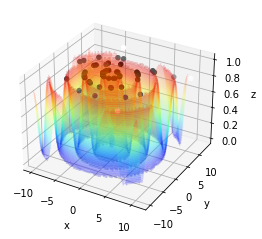

In [244]:
x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)

X, Y = np.meshgrid(x, y)
Z = schaffer_function_plot(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='jet', alpha=0.2)
ax.scatter3D(x_data, y_data, z_data, c=z_data, cmap='binary', alpha=1)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
